**EMPLOYEE ATTRITION PREDICTION**

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

* Education
> 1 : 'Below College',
> 2 : 'College',
> 3 : 'Bachelor',
> 4 : 'Master',
> 5 : 'Doctor'

* EnvironmentSatisfaction
> 1 : 'Low',
> 2 : 'Medium',
> 3 : 'High',
> 4 : 'Very High'

* JobInvolvement
> 1 : 'Low',
> 2 : 'Medium',
> 3 : 'High',
> 4 : 'Very High'

* JobSatisfaction
> 1 : 'Low',
> 2 : 'Medium',
> 3 : 'High',
> 4 : 'Very High'

* PerformanceRating
> 1 : 'Low',
> 2 : 'Good',
> 3 : 'Excellent',
> 4 : 'Outstanding'

* RelationshipSatisfaction
> 1 : 'Low',
> 2 : 'Medium',
> 3 : 'High',
> 4 : 'Very High'

* WorkLifeBalance
> 1 : 'Bad',
> 2 : 'Good',
> 3 : 'Better',
> 4 : 'Best'

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format',lambda x : '%.2f'%x)

# Reading Train Data Set

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [5]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00,1677.00
mean,838.00,36.04,892.75,8.68,2.94,1.00,2.76,67.80,2.78,2.00,2.79,6196.05,14770.05,2.57,14.90,3.13,2.75,80.00,0.72,10.71,2.73,2.77,6.81,4.14,1.98,4.19,0.12
std,484.25,8.51,374.50,7.83,1.04,0.00,1.09,19.44,0.65,1.08,1.10,4520.05,7112.20,2.48,3.42,0.33,1.08,0.00,0.77,7.26,1.15,0.65,5.88,3.58,3.05,3.58,0.32
min,0.00,18.00,107.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1010.00,636.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,419.00,30.00,589.00,2.00,2.00,1.00,2.00,51.00,2.00,1.00,2.00,2875.00,8509.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00,0.00
50%,838.00,35.00,890.00,7.00,3.00,1.00,3.00,69.00,3.00,2.00,3.00,4834.00,15332.00,1.00,14.00,3.00,3.00,80.00,1.00,9.00,3.00,3.00,5.00,3.00,1.00,3.00,0.00
75%,1257.00,41.00,1223.00,12.00,4.00,1.00,4.00,84.00,3.00,2.00,4.00,7403.00,20990.00,4.00,17.00,3.00,4.00,80.00,1.00,14.00,3.00,3.00,9.00,7.00,2.00,7.00,0.00
max,1676.00,60.00,3921.00,29.00,15.00,1.00,4.00,100.00,4.00,7.00,4.00,19973.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,41.00,6.00,4.00,41.00,18.00,15.00,17.00,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

<Axes: >

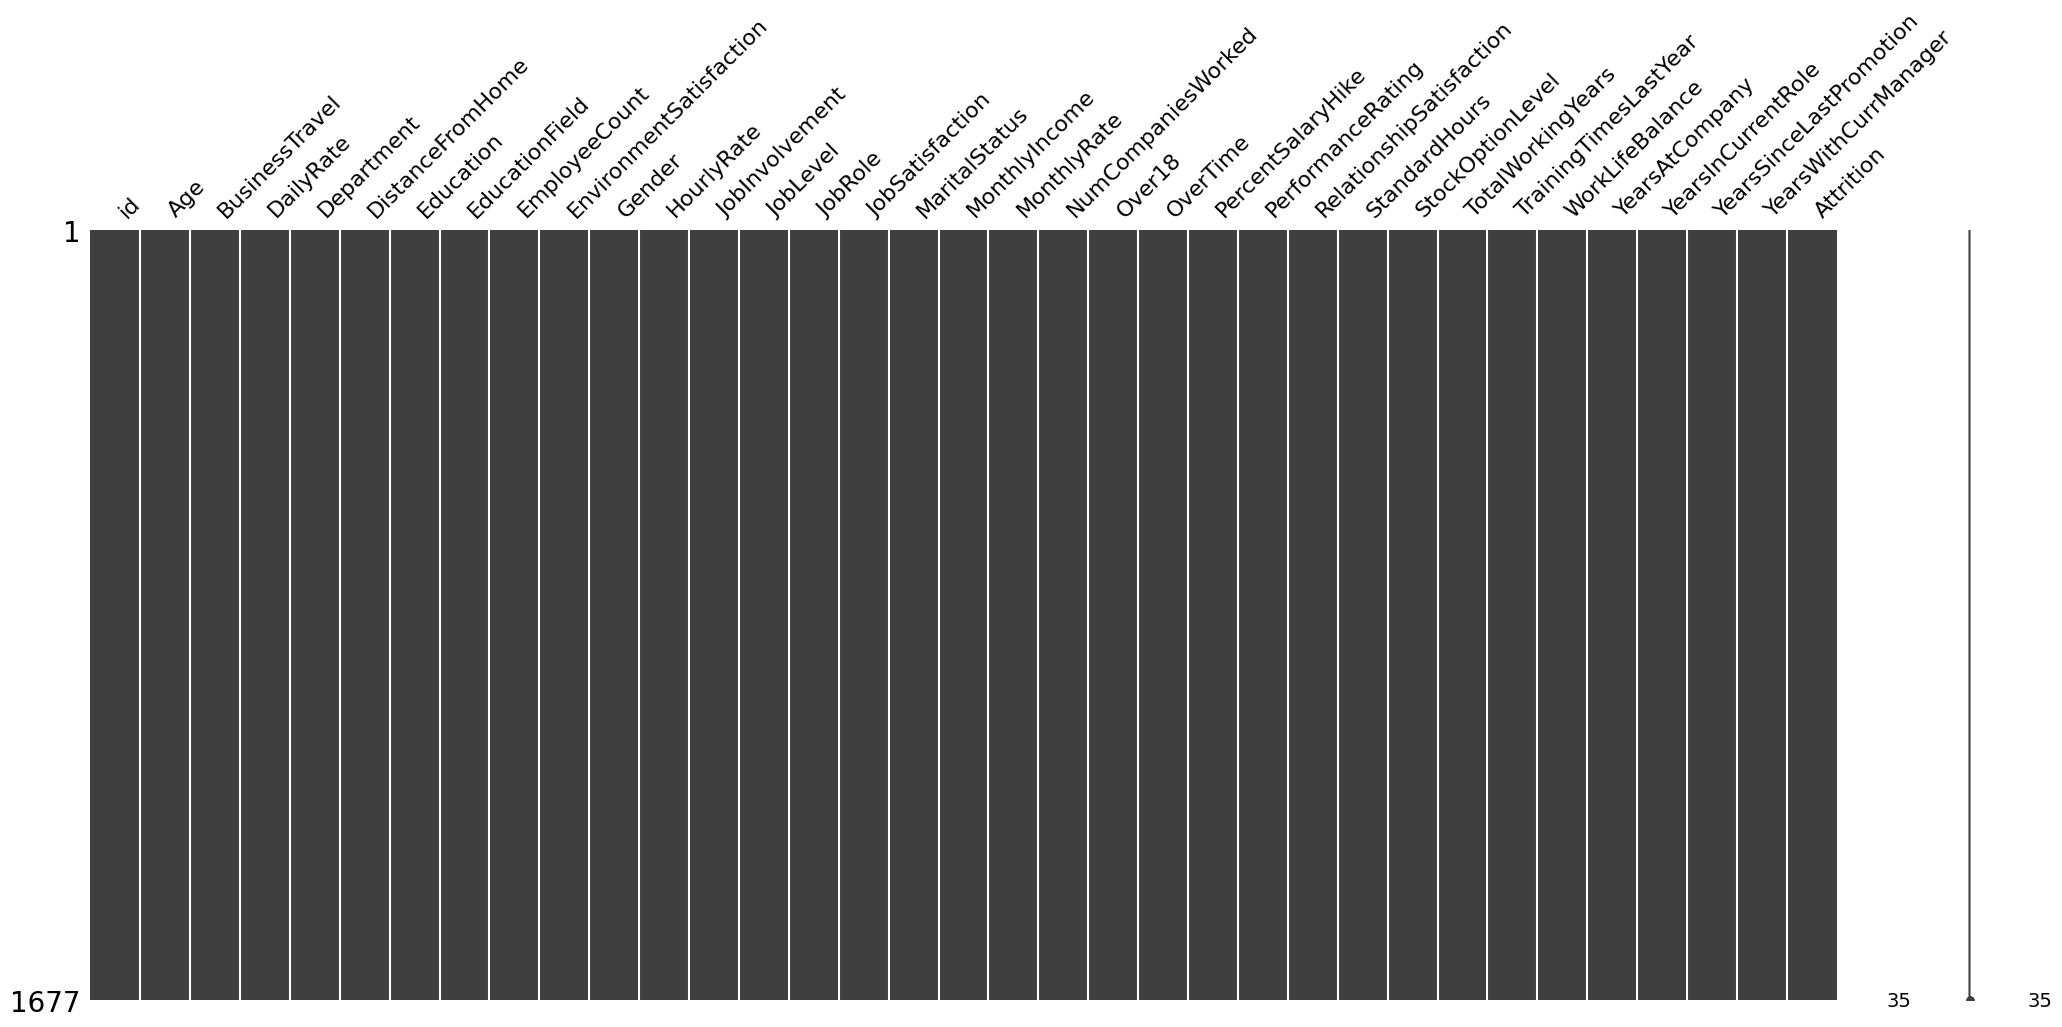

In [7]:
import missingno as msn
msn.matrix(df)

* Theres no missing Values in the Dataset.

# EDA

## 1. Age

<Axes: xlabel='Age', ylabel='Count'>

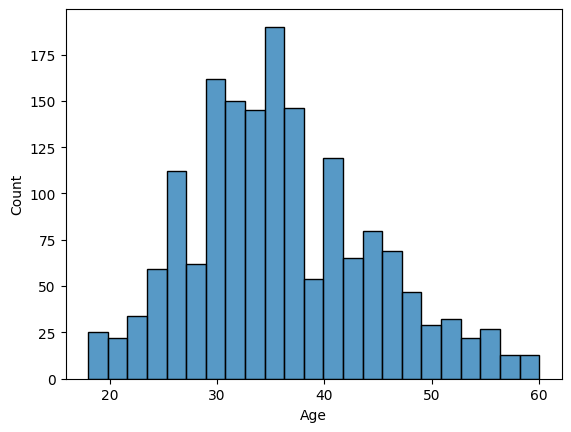

In [8]:
sns.histplot(data=df,x='Age')

# Theres no outlier in age features.
* Now we are going to check Age features minimum value and over18 feature which contains all Yes Value so that we can drop the over18 columns as it will be a feature of no use to model.

In [9]:
df.Age.min()

18

* So everyone is avobe 18 so we can drop **Over18** features from our data set in the cleaning phase.
* And we are going to remove **id** feature as well.

# 2. Business Travel

<Axes: xlabel='BusinessTravel', ylabel='count'>

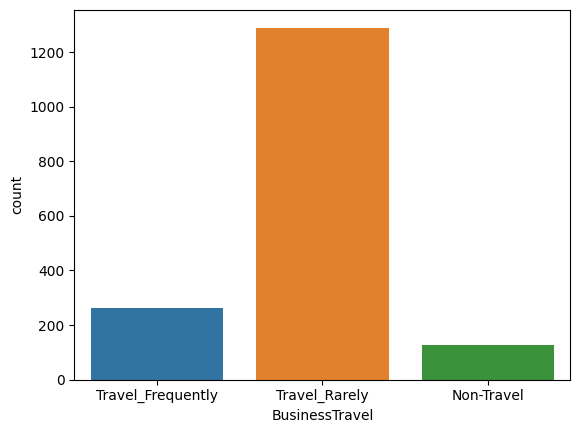

In [10]:
sns.countplot(data=df,x='BusinessTravel')

### BusinessTravel Based on Attrition Rate

<Axes: xlabel='BusinessTravel', ylabel='count'>

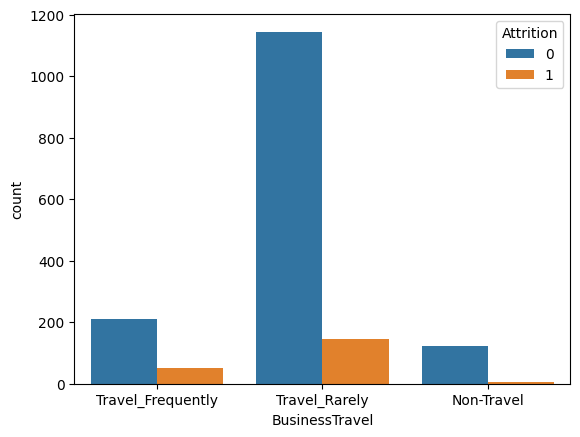

In [11]:
sns.countplot(data=df,x='BusinessTravel',hue='Attrition')

* We got to know that People who **do not travel** at all have a very low rate of Attrition.

## 3. DailyRate

<Axes: xlabel='DailyRate', ylabel='Count'>

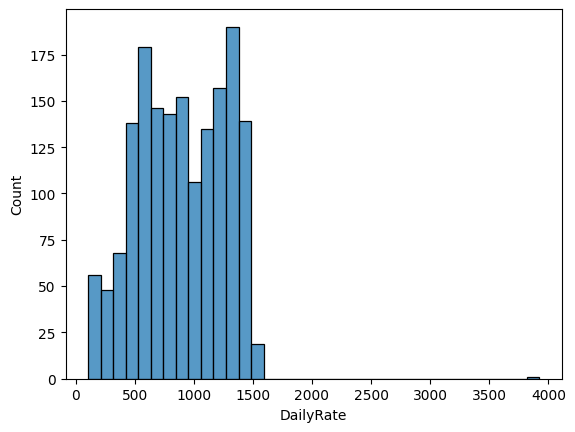

In [12]:
sns.histplot(data=df,x='DailyRate')

## 4. Department

<Axes: xlabel='Department', ylabel='count'>

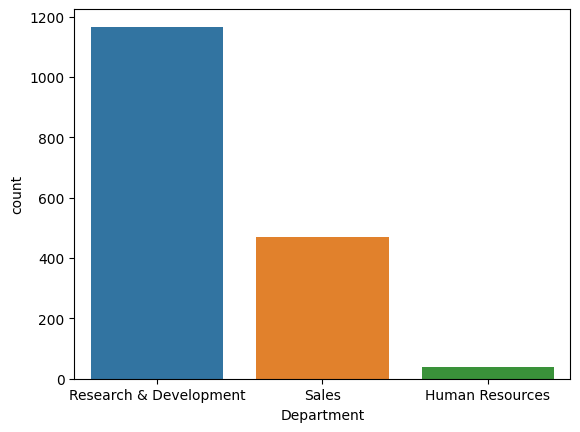

In [13]:
sns.countplot(data=df,x='Department')

### Count Plot Based on Attrition`

<Axes: xlabel='Department', ylabel='count'>

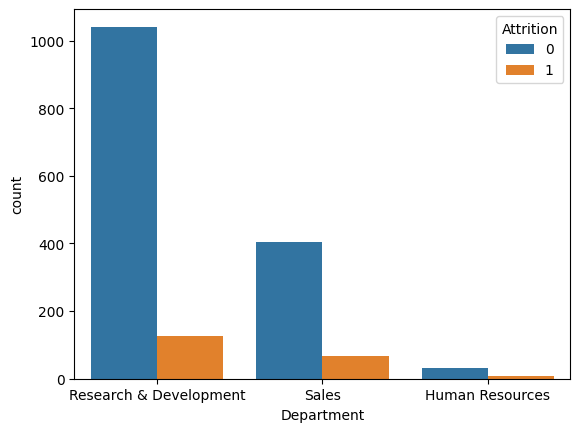

In [14]:
sns.countplot(data=df,x='Department',hue='Attrition')

## 5.Distance From Home (in Km)

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

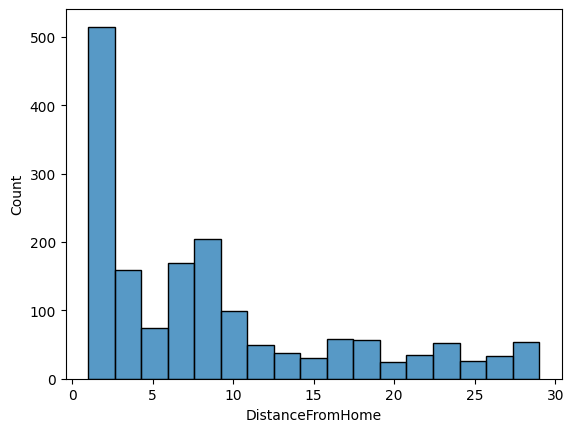

In [15]:
sns.histplot(data=df,x='DistanceFromHome')

## 6.Education

Text(0.5, 0, "['Below College', 'College', 'Bachelor', 'Master', 'Doctor', 'Other']")

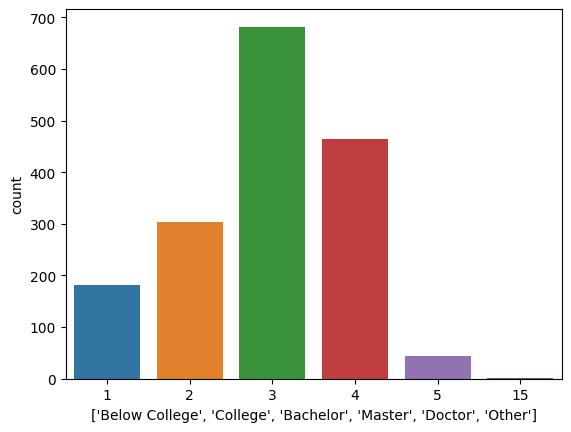

In [16]:
sns.countplot(data=df,x='Education',)
plt.xlabel(['Below College', 'College', 'Bachelor', 'Master','Doctor','Other'])

<Axes: xlabel='Education', ylabel='count'>

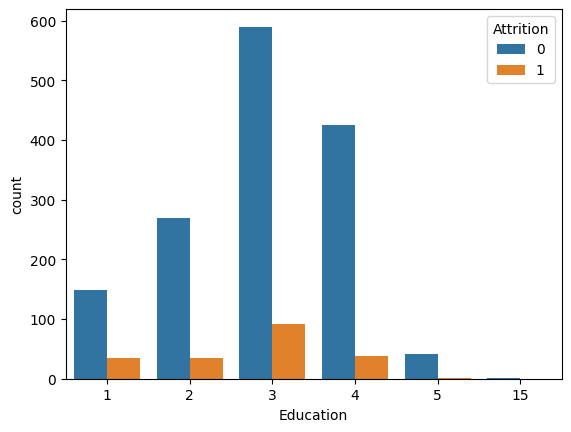

In [17]:
sns.countplot(data=df,x='Education',hue='Attrition')

## 7.EducationField

<Axes: xlabel='EducationField', ylabel='count'>

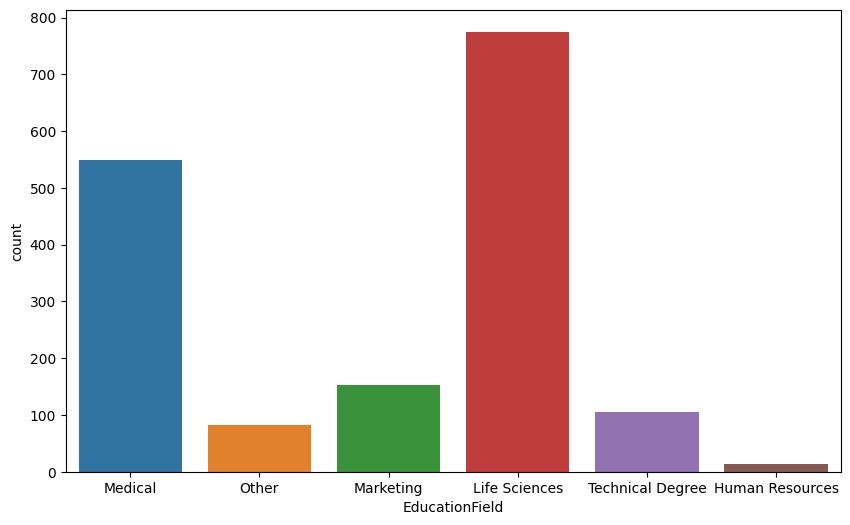

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='EducationField',)

## 8.EmployeeCount

<Axes: xlabel='EmployeeCount', ylabel='count'>

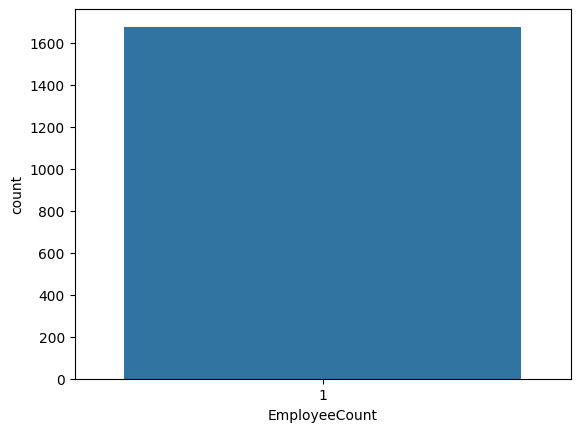

In [19]:
sns.countplot(data=df,x='EmployeeCount')

* We will be going to drop this column/feature as it only contains only one value is no use for the prediction

## 9.EnvironmentSatisfaction

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

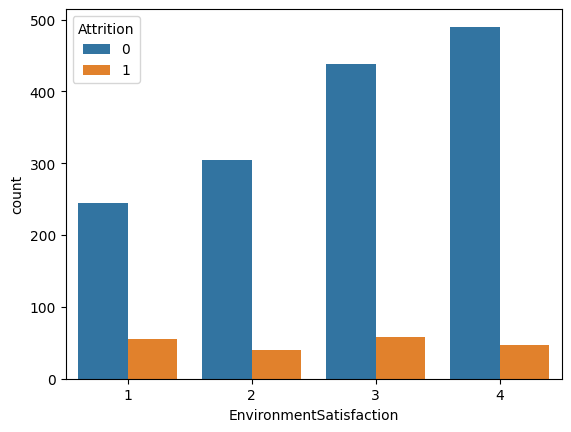

In [20]:
sns.countplot(data=df,x='EnvironmentSatisfaction',hue='Attrition')

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

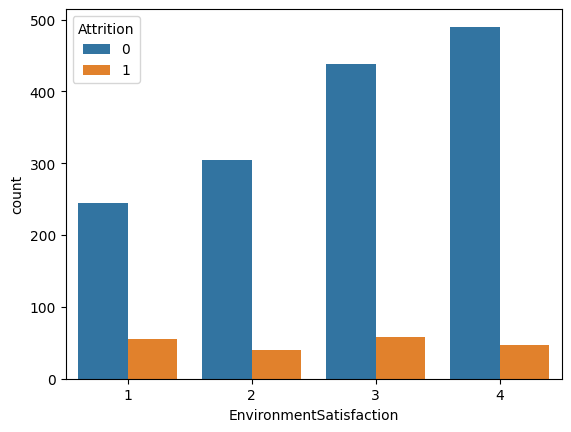

In [21]:
sns.countplot(data=df,x='EnvironmentSatisfaction',hue='Attrition')

## 10.Gender

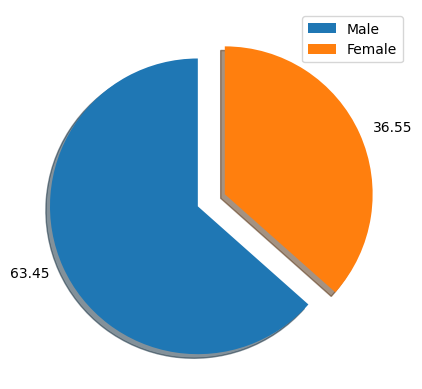

In [22]:
plt.pie(df.Gender.value_counts(),labels=[round((df.Gender.value_counts()[0]/df.Gender.value_counts().sum())*100,2),round((df.Gender.value_counts()[1]/df.Gender.value_counts().sum())*100,2)],explode=[0.2,0],shadow=True,startangle=90,);
plt.legend(['Male','Female']);

<Axes: xlabel='Gender', ylabel='count'>

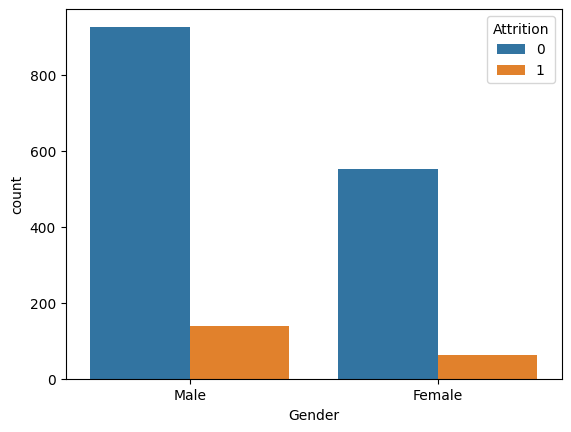

In [23]:
sns.countplot(data=df,x='Gender',hue='Attrition')

<Axes: xlabel='Gender', ylabel='count'>

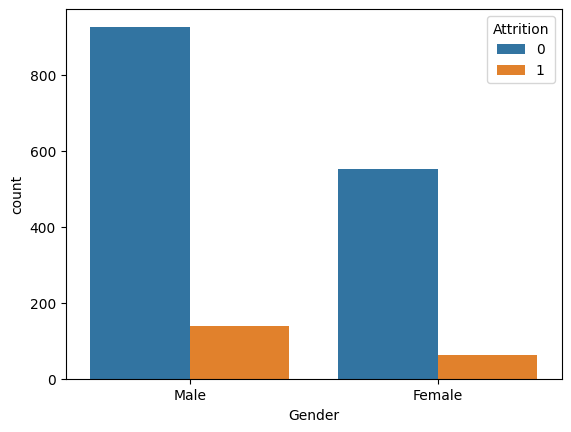

In [24]:
sns.countplot(data=df,x='Gender',hue='Attrition')

## 11.HourlyRate

<Axes: xlabel='HourlyRate', ylabel='Count'>

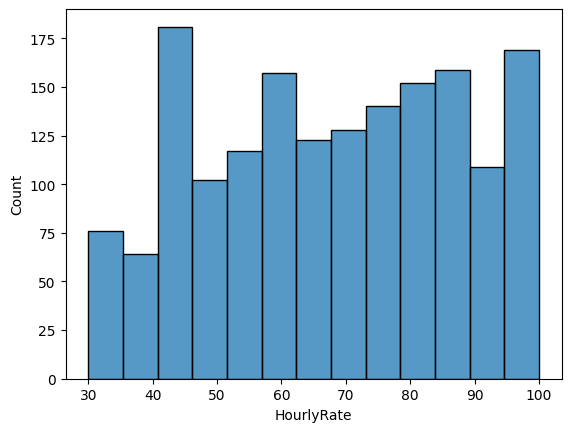

In [25]:
sns.histplot(data=df,x='HourlyRate')

## 12.JobInvolvement

<Axes: xlabel='JobInvolvement', ylabel='count'>

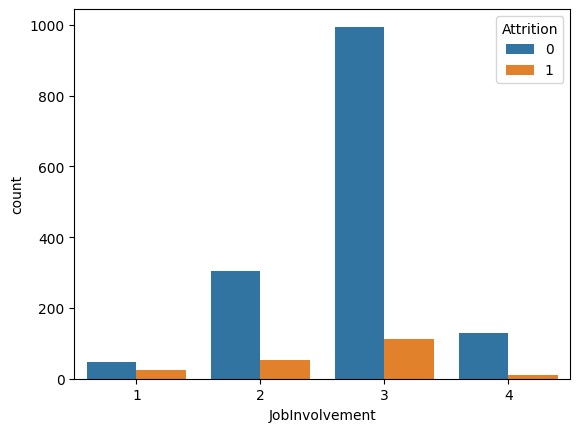

In [26]:
sns.countplot(data=df,x='JobInvolvement',hue='Attrition')

<Axes: xlabel='JobInvolvement', ylabel='count'>

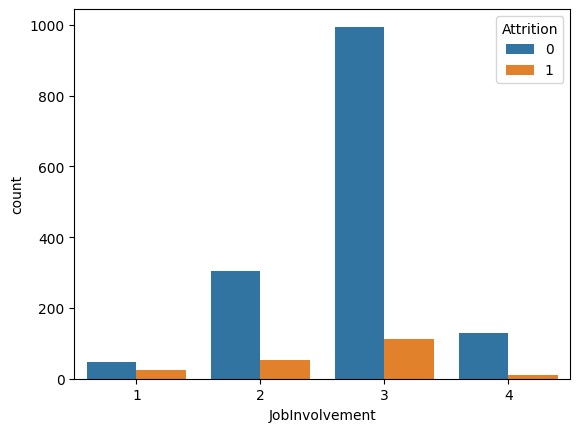

In [27]:
sns.countplot(data=df,x='JobInvolvement',hue='Attrition')

## 13.JobLevel

<Axes: xlabel='JobLevel', ylabel='count'>

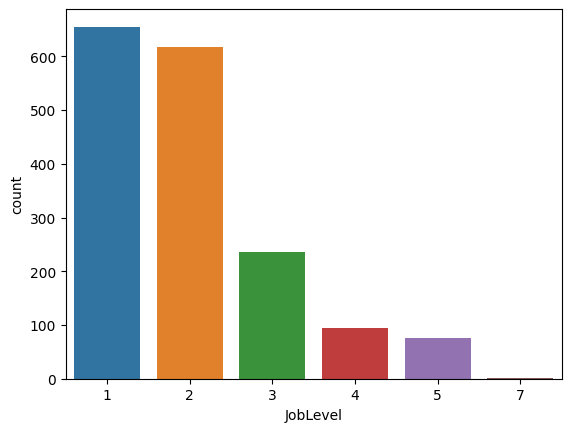

In [28]:
sns.countplot(data=df,x='JobLevel')

## JobRole

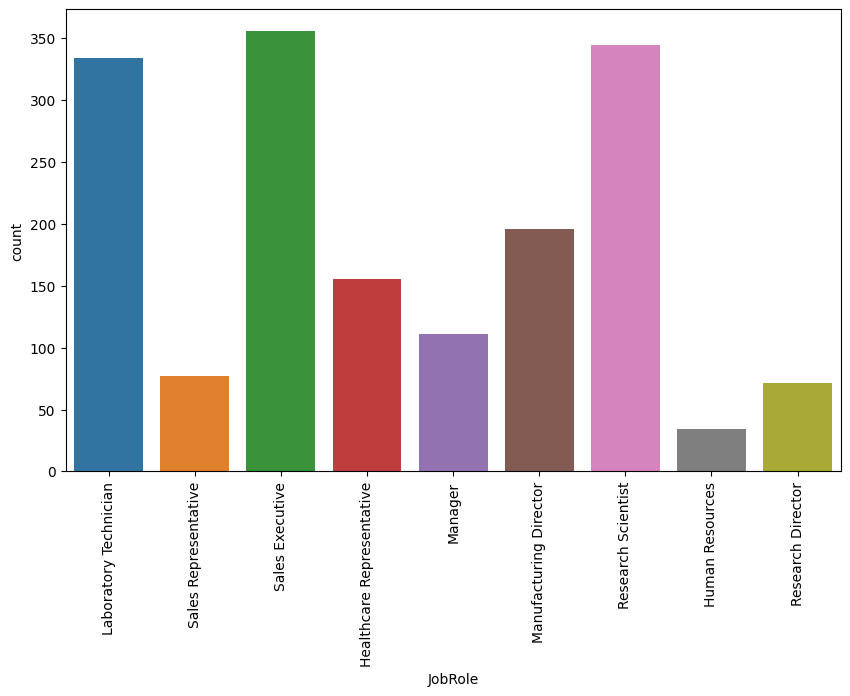

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='JobRole')
plt.xticks(rotation=90);

<Axes: xlabel='JobSatisfaction', ylabel='count'>

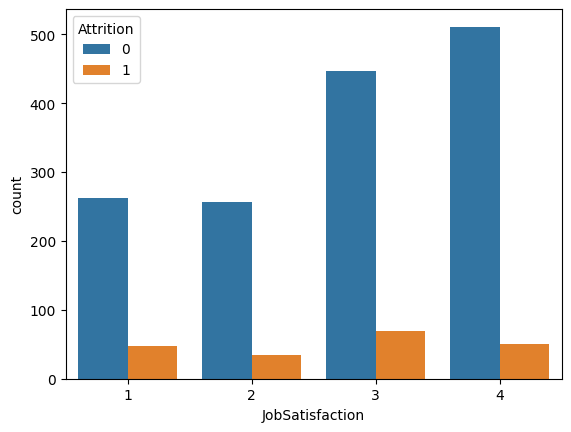

In [30]:
sns.countplot(data=df,x='JobSatisfaction',hue='Attrition')

### JobSatisfaction Based on Attrition

<Axes: xlabel='JobSatisfaction', ylabel='count'>

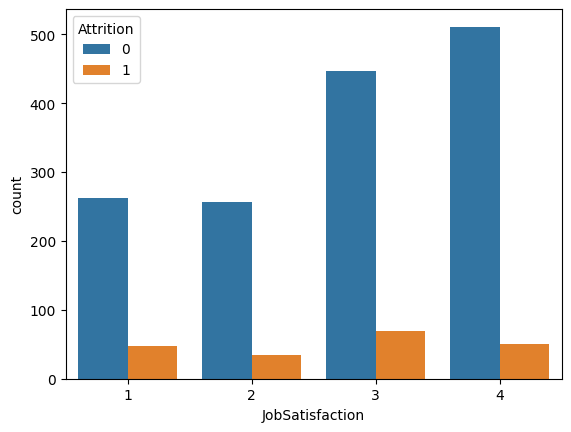

In [31]:
sns.countplot(data=df,x='JobSatisfaction',hue='Attrition')

<Axes: xlabel='MaritalStatus', ylabel='count'>

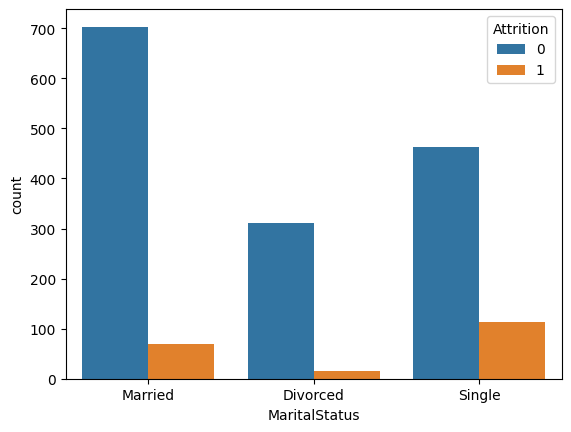

In [32]:
sns.countplot(data=df,x='MaritalStatus',hue='Attrition')

### MaritalStatus based on Attrition`

<Axes: xlabel='MaritalStatus', ylabel='count'>

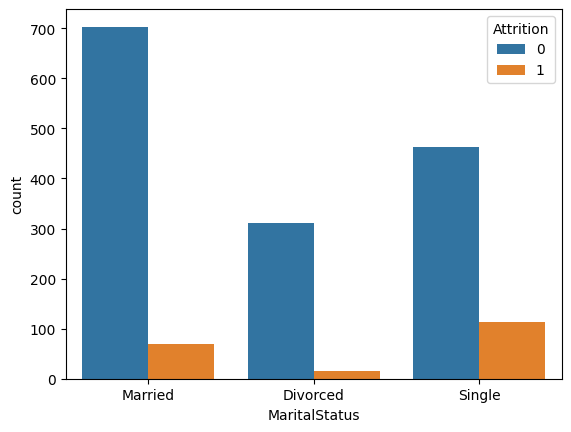

In [33]:
sns.countplot(data=df,x='MaritalStatus',hue='Attrition')

## Monthly Income

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

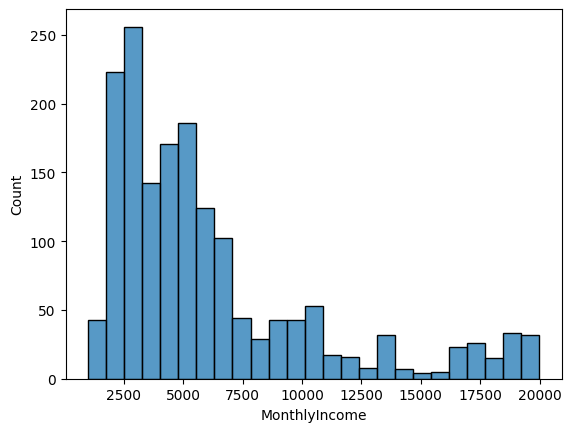

In [34]:
sns.histplot(data=df,x='MonthlyIncome')

## Monthly Rate

<Axes: xlabel='MonthlyRate', ylabel='Count'>

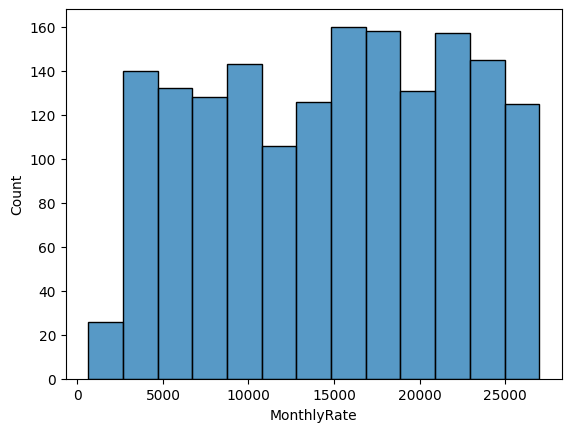

In [35]:
sns.histplot(data=df,x='MonthlyRate')

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

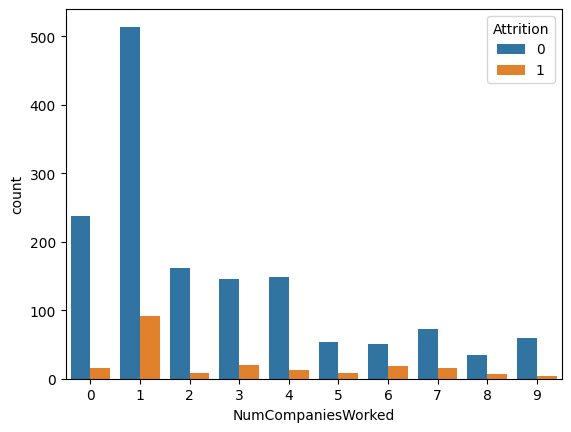

In [36]:
sns.countplot(data=df,x='NumCompaniesWorked',hue='Attrition')

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

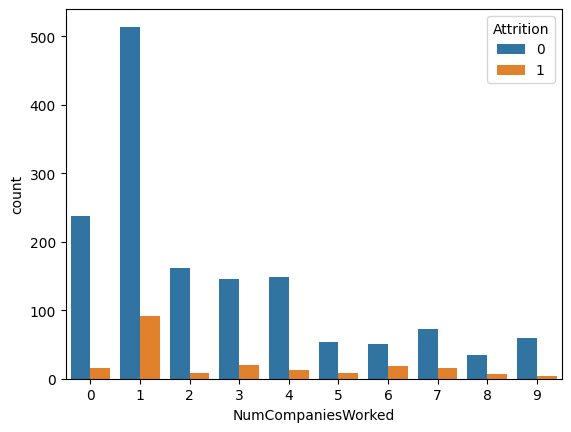

In [37]:
sns.countplot(data=df,x='NumCompaniesWorked',hue='Attrition')

<Axes: xlabel='OverTime', ylabel='count'>

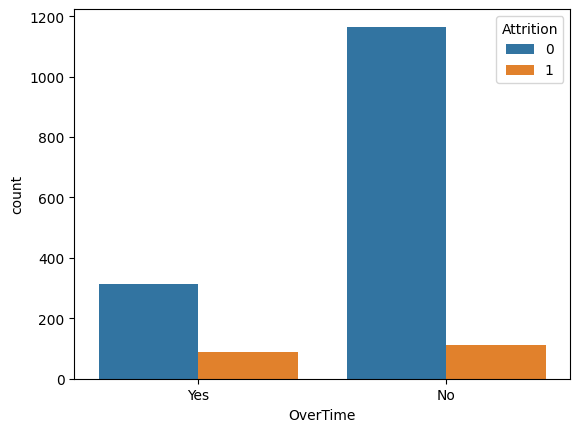

In [38]:
sns.countplot(data=df,x='OverTime',hue='Attrition')

<Axes: xlabel='OverTime', ylabel='count'>

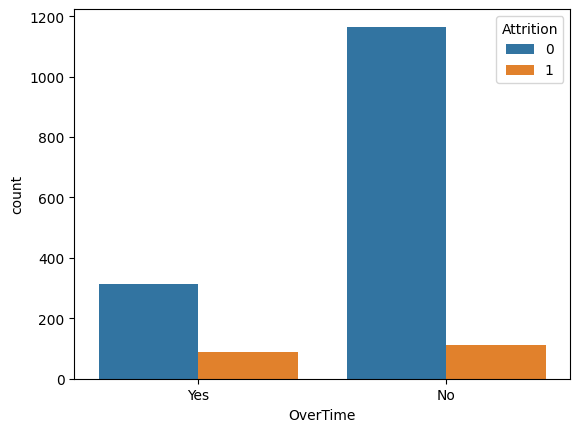

In [39]:
sns.countplot(data=df,x='OverTime',hue='Attrition')

* We will be dropping this feature as it contains only one value and will not help in model predictions

<Axes: xlabel='StockOptionLevel', ylabel='count'>

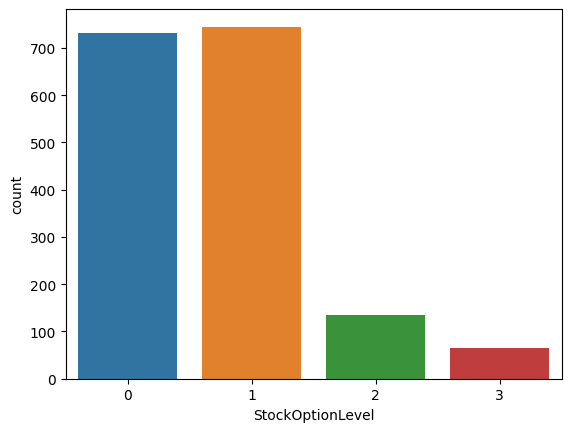

In [40]:
sns.countplot(data=df,x='StockOptionLevel')

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

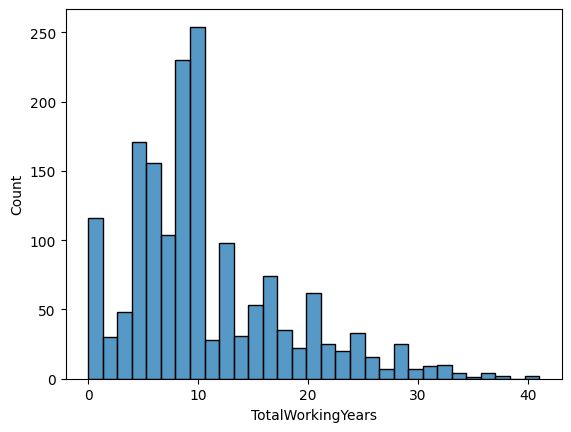

In [41]:
sns.histplot(data=df,x='TotalWorkingYears')

<Axes: xlabel='TrainingTimesLastYear', ylabel='count'>

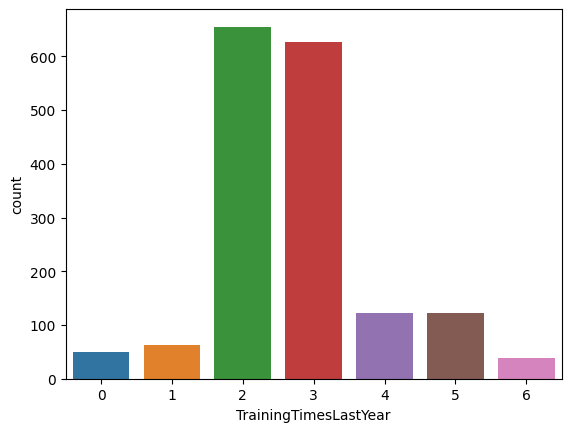

In [42]:
sns.countplot(data=df,x='TrainingTimesLastYear')

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

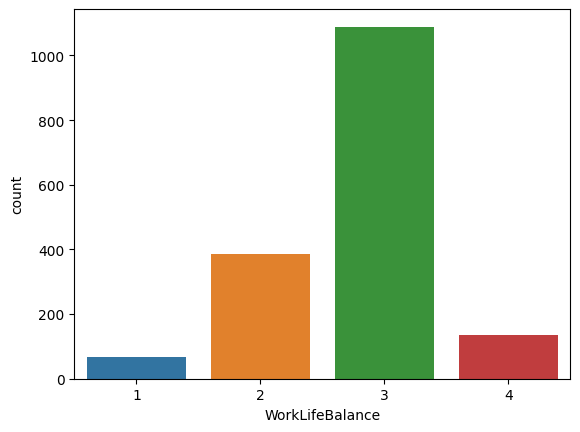

In [43]:
sns.countplot(data=df,x='WorkLifeBalance')

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

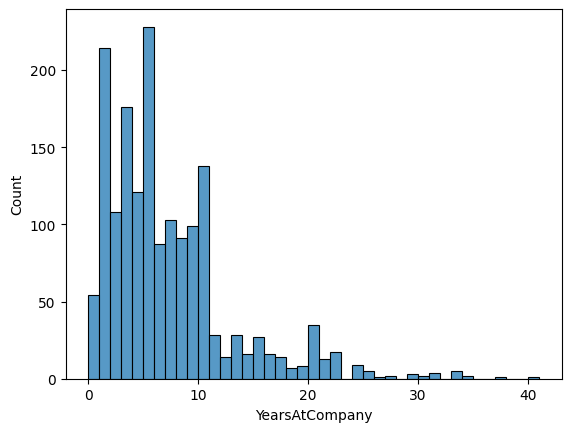

In [44]:
sns.histplot(data=df,x='YearsAtCompany')

<Axes: xlabel='YearsInCurrentRole', ylabel='count'>

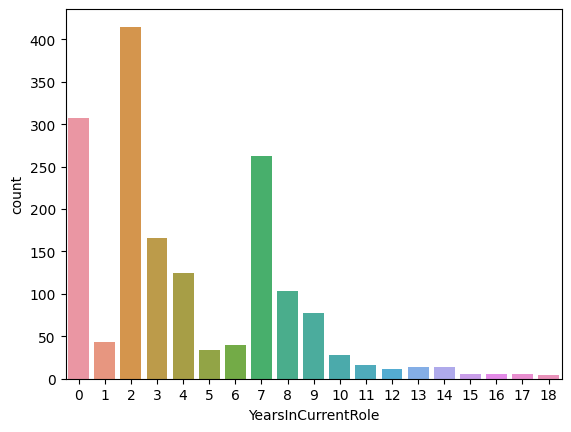

In [45]:
sns.countplot(data=df,x='YearsInCurrentRole')

<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

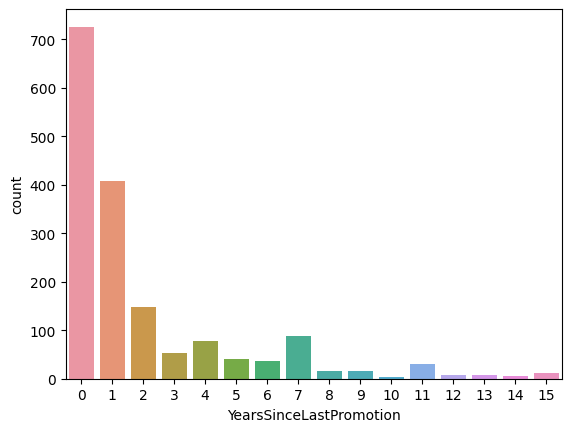

In [46]:
sns.countplot(data=df,x='YearsSinceLastPromotion')

<Axes: xlabel='YearsWithCurrManager', ylabel='count'>

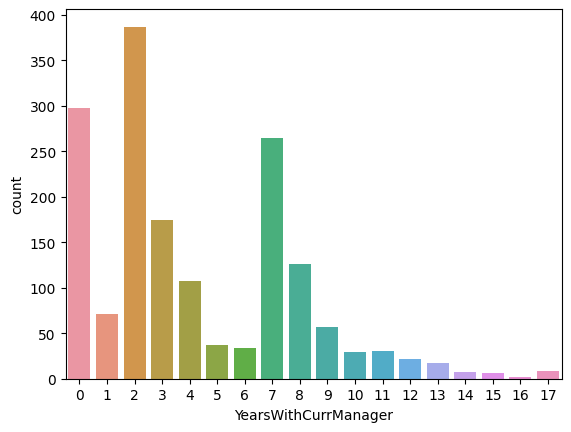

In [47]:
sns.countplot(data=df,x='YearsWithCurrManager')

## Attrition

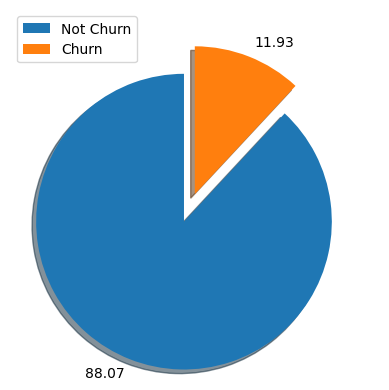

In [48]:
plt.pie(df.Attrition.value_counts(),labels=[round(147700/1677,2),round(20000/1677,2)],explode=[0.2,0],shadow=True,startangle=90,);
plt.legend(['Not Churn','Churn']);

# Making a function to clean the data efficiently and making it ready for modeling.

In [49]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [50]:
num_cols = list(df.select_dtypes('number'))

In [51]:
num_cols

['id',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition']

In [52]:
for i in list(df.columns):
    if df[i].nunique() >2 and df[i].dtypes == 'O':
        print(i,'\t',df[i].unique())

BusinessTravel 	 ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Department 	 ['Research & Development' 'Sales' 'Human Resources']
EducationField 	 ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
JobRole 	 ['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
MaritalStatus 	 ['Married' 'Divorced' 'Single']


In [53]:
def cleandata(df):
    df.drop(['id','Over18','StandardHours','EmployeeCount','EducationField','JobRole'],axis=1,inplace= True)
    df.MaritalStatus.replace({'Divorced':'Single'},inplace=True)
    df.OverTime.replace({'Yes':1,'No':0},inplace=True)
    df = pd.get_dummies(data=df,columns=['Gender','BusinessTravel','Department','MaritalStatus'],drop_first=True)
    return df

In [54]:
cleaneddf = cleandata(df)

In [55]:
cleaneddf.to_csv('cleantrain.csv',index=False)

pip install catboost

pip install xgboost

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,roc_auc_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [78]:
X = cleaneddf.drop('Attrition',axis=1)
y = cleaneddf[['Attrition']]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Scaling Data to same range

In [82]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
model_list = [('LR',LogisticRegression()),
             ('DT',DecisionTreeClassifier()),
              ('RF',RandomForestClassifier(n_estimators=150)),
              ('GBC',GradientBoostingClassifier(n_estimators=150)),
              ('SVC',SVC(kernel='rbf')),
              ('KNN',KNeighborsClassifier(n_neighbors=11)),
              ('GNB',GaussianNB()),
              ('BNB',BernoulliNB()),
              ('CB',CatBoostClassifier(verbose=0)),
              ('XBG',XGBClassifier(verbosity=0))
             ]

In [88]:
model_dict1 = {}
for model_name,model in model_list:
    print(model_name)
    model.fit(X_train,y_train)
    print('Training Set Score',model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    print('Test Set Accuracy:',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    score = cross_val_score(model,X_train,y_train,cv=5)
    model_dict1[model_name] = {'Test ACC':round(accuracy_score(y_test,y_pred)*100,2),
                             'Recall':round(recall_score(y_test,y_pred)*100,2),
                             'Precision':round(precision_score(y_test,y_pred)*100,2),
                              'F1-Score':round(f1_score(y_test,y_pred)*100,2),
                              'ROC_AUC':round(roc_auc_score(y_test,y_pred,)*100,2),
                               'Cross Val Score':round((score.mean())*100,2)
                             }

LR
Training Set Score 0.8926174496644296
Test Set Accuracy: 0.8869047619047619
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       296
           1       0.58      0.17      0.27        40

    accuracy                           0.89       336
   macro avg       0.74      0.58      0.60       336
weighted avg       0.86      0.89      0.86       336

Confusion Matrix:
 [[291   5]
 [ 33   7]]


DT
Training Set Score 1.0
Test Set Accuracy: 0.8303571428571429
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       296
           1       0.31      0.35      0.33        40

    accuracy                           0.83       336
   macro avg       0.61      0.62      0.62       336
weighted avg       0.84      0.83      0.83       336

Confusion Matrix:
 [[265  31]
 [ 26  14]]


RF
Training Set Score 1.0
Test Set Accuracy: 0.8839285714285714
              precision    recall  f1-score   suppo

In [89]:
model_comp1 = pd.DataFrame(model_dict1).T
model_comp1.sort_values('ROC_AUC',ascending=False)

,Test ACC,Recall,Precision,F1-Score,ROC_AUC,Cross Val Score
GNB,79.76,42.50,27.42,33.33,63.65,82.25
DT,83.04,35.00,31.11,32.94,62.26,83.00
GBC,88.69,22.50,56.25,32.14,60.07,89.04
BNB,87.80,22.50,47.37,30.51,59.56,87.62
XBG,87.20,20.00,42.11,27.12,58.14,88.74
LR,88.69,17.50,58.33,26.92,57.91,88.59
CB,88.39,10.00,57.14,17.02,54.49,89.49
RF,88.39,5.00,66.67,9.30,52.33,88.81
SVC,88.10,0.00,0.00,0.00,50.00,88.07
KNN,88.10,0.00,0.00,0.00,50.00,87.92


# Now we will do the oversampling

In [90]:
sm = SMOTE()
XR,yR = sm.fit_resample(X,y)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(XR, yR, test_size=0.2, random_state=42)

In [92]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
model_dict2 = {}
for model_name,model in model_list:
    print(model_name)
    model.fit(X_train,y_train)
    print('Training Set Score',model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    print('Test Set Accuracy:',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    score = cross_val_score(model,X_train,y_train,cv=5)
    model_dict2[model_name] = {'Test ACC':round(accuracy_score(y_test,y_pred)*100,2),
                             'Recall':round(recall_score(y_test,y_pred)*100,2),
                             'Precision':round(precision_score(y_test,y_pred)*100,2),
                              'F1-Score':round(f1_score(y_test,y_pred)*100,2),
                              'ROC_AUC':round(roc_auc_score(y_test,y_pred,)*100,2),
                               'Cross Val Score':round((score.mean())*100,2)
                             }

LR
Training Set Score 0.8683876428269149
Test Set Accuracy: 0.8798646362098139
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       317
           1       0.89      0.85      0.87       274

    accuracy                           0.88       591
   macro avg       0.88      0.88      0.88       591
weighted avg       0.88      0.88      0.88       591

Confusion Matrix:
 [[287  30]
 [ 41 233]]


DT
Training Set Score 1.0
Test Set Accuracy: 0.8730964467005076
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       317
           1       0.84      0.89      0.87       274

    accuracy                           0.87       591
   macro avg       0.87      0.87      0.87       591
weighted avg       0.87      0.87      0.87       591

Confusion Matrix:
 [[272  45]
 [ 30 244]]


RF
Training Set Score 1.0
Test Set Accuracy: 0.9475465313028765
              precision    recall  f1-score   suppo

In [95]:
model_comp2 = pd.DataFrame(model_dict2).T
model_comp2.sort_values('ROC_AUC',ascending=False)

,Test ACC,Recall,Precision,F1-Score,ROC_AUC,Cross Val Score
CB,94.75,94.16,94.51,94.33,94.71,93.31
XBG,94.75,93.80,94.83,94.31,94.69,93.69
RF,94.75,91.97,96.55,94.21,94.57,93.53
SVC,93.40,90.88,94.68,92.74,93.23,91.83
GBC,93.06,91.97,92.99,92.48,92.99,91.33
KNN,89.00,97.45,82.15,89.15,89.57,86.20
LR,87.99,85.04,88.59,86.78,87.79,86.37
DT,87.31,89.05,84.43,86.68,87.43,86.80
BNB,78.51,77.37,76.53,76.95,78.43,78.97
GNB,76.99,81.75,72.26,76.71,77.31,76.43
